In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [98]:
earthquakes = pd.read_csv('../Data/earthquakes-2024-11-12_20-00-06_-0700.tsv', encoding='ISO-8859-1', sep='\t')
print("Earthquake Data:")
earthquakes.head()  # Display the first few rows

Earthquake Data:


,Search Parameters,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,Location Name,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,-2150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"JORDAN: BAB-A-DARAA,AL-KARAK",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,-2000.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,SYRIA: UGARIT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,-2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TURKMENISTAN: W,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
4,NaN,-1610.0,NaN,NaN,NaN,NaN,NaN,3.0,1351.0,GREECE: THERA ISLAND (SANTORINI),...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN


In [99]:
storms = pd.read_csv('../Data/StormEvents_details-ftp_v1.0_d1950_c20210803.csv', encoding='ISO-8859-1')
print("Storm Data:")
storms.head()  # Display the first few rows

Storm Data:


,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,195004,28,1445,195004,28,1445,NaN,10096222,OKLAHOMA,40,...,0,NaN,NaN,35.12,-99.20,35.17,-99.20,NaN,NaN,PUB
1,195004,29,1530,195004,29,1530,NaN,10120412,TEXAS,48,...,0,NaN,NaN,31.90,-98.60,31.73,-98.60,NaN,NaN,PUB
2,195007,5,1800,195007,5,1800,NaN,10104927,PENNSYLVANIA,42,...,0,NaN,NaN,40.58,-75.70,40.65,-75.47,NaN,NaN,PUB
3,195007,5,1830,195007,5,1830,NaN,10104928,PENNSYLVANIA,42,...,0,NaN,NaN,40.60,-76.75,NaN,NaN,NaN,NaN,PUB
4,195007,24,1440,195007,24,1440,NaN,10104929,PENNSYLVANIA,42,...,0,NaN,NaN,41.63,-79.68,NaN,NaN,NaN,NaN,PUB


In [100]:
tsunamis = pd.read_csv('../Data/tsunamis-2024-11-12_19-46-31_-0700.tsv', encoding='ISO-8859-1', sep='\t')
print("Tsunami Data:")
tsunamis.head()  # Display the first few rows


Tsunami Data:


,Search Parameters,Year,Mo,Dy,Hr,Mn,Sec,Tsunami Event Validity,Tsunami Cause Code,Earthquake Magnitude,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,-2000.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN
2,NaN,-1610.0,NaN,NaN,NaN,NaN,NaN,4.0,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
3,NaN,-1365.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
4,NaN,-1300.0,NaN,NaN,NaN,NaN,NaN,2.0,0.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
volcanoes = pd.read_csv('../Data/volcanoes-2024-11-12_20-06-49_-0700.tsv', encoding='ISO-8859-1', sep='\t')
print("Volcano Data:")
volcanoes.head()  

Volcano Data:


,Search Parameters,Volcano Number,Volcano Name,Country,Location,Latitude,Longitude,Elevation (m),Type,Status,Last Known Eruption
0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,250010.0,St. Andrew Strait,Papua New Guinea,Admiralty Is-SW Paci,-2.38,147.35,270.0,Complex volcano,Historical,D2
2,NaN,250020.0,Baluan,United States,Admiralty Is-SW Paci,-2.57,147.28,254.0,Stratovolcano,Holocene,U
3,NaN,250030.0,Central Bismarck Sea,United States,Admiralty Is-SW Paci,-3.03,147.78,-1300.0,Submarine volcano,Hydrophonic,D1
4,NaN,NaN,Dacht-I-Navar Group,Afghanistan,Afghanistan,33.95,67.92,3800.0,Lava dome,Holocene,U


In [102]:
emdat = pd.read_excel('../Data/public_emdat_custom_request_2024-09-21_34981889-794d-4608-910c-8ce0702538b0.xlsx')
print("EM-DAT Disaster Data:")
emdat.head() 

EM-DAT Disaster Data:


,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,1999-9388-DJI,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,DJI,...,NaN,NaN,NaN,NaN,NaN,NaN,58.111474,"[{""adm1_code"":1093,""adm1_name"":""Ali Sabieh""},{...",2006-03-01,2023-09-25
1,1999-9388-SDN,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,SDN,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm1_code"":2757,""adm1_name"":""Northern Darfu...",2006-03-08,2023-09-25
2,1999-9388-SOM,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,SOM,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm1_code"":2691,""adm1_name"":""Bay""},{""adm1_c...",2006-03-08,2023-09-25
3,2000-0001-AGO,No,tec-tra-roa-roa,Technological,Transport,Road,Road,NaN,NaN,AGO,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,NaN,2004-10-27,2023-09-25
4,2000-0002-AGO,No,nat-hyd-flo-riv,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,AGO,...,NaN,NaN,NaN,NaN,10000.0,17695.0,56.514291,"[{""adm2_code"":4214,""adm2_name"":""Baia Farta""},{...",2005-02-03,2023-09-25


In [103]:
import pandas as pd

file_paths = {
    'Earthquake': '../Data/earthquakes-2024-11-12_20-00-06_-0700.tsv',
    'Storm': '../Data/StormEvents_details-ftp_v1.0_d1950_c20210803.csv',
    'Tsunami': '../Data/tsunamis-2024-11-12_19-46-31_-0700.tsv',
    'Volcano': '../Data/volcanoes-2024-11-12_20-06-49_-0700.tsv',
    'EM-DAT': '../Data/public_emdat_custom_request_2024-09-21_34981889-794d-4608-910c-8ce0702538b0.xlsx',
}

def display_columns(file_paths):
    for name, path in file_paths.items():
        try:
           
            if path.endswith('.csv'):
                data = pd.read_csv(path, encoding='ISO-8859-1')
            elif path.endswith('.tsv'):
                data = pd.read_csv(path, sep='\t', encoding='ISO-8859-1')
            elif path.endswith('.xlsx'):
                data = pd.read_excel(path)
            else:
                print(f"Unsupported file format for {name}")
                continue

      
            print(f"\n{name} Data Columns:\n", data.columns.tolist())
        
        except Exception as e:
            print(f"Error loading {name}: {e}")

display_columns(file_paths)


Earthquake Data Columns:
 ['Search Parameters', 'Year', 'Mo', 'Dy', 'Hr', 'Mn', 'Sec', 'Tsu', 'Vol', 'Location Name', 'Latitude', 'Longitude', 'Focal Depth (km)', 'Mag', 'MMI Int', 'Deaths', 'Death Description', 'Missing', 'Missing Description', 'Injuries', 'Injuries Description', 'Damage ($Mil)', 'Damage Description', 'Houses Destroyed', 'Houses Destroyed Description', 'Houses Damaged', 'Houses Damaged Description', 'Total Deaths', 'Total Death Description', 'Total Missing', 'Total Missing Description', 'Total Injuries', 'Total Injuries Description', 'Total Damage ($Mil)', 'Total Damage Description', 'Total Houses Destroyed', 'Total Houses Destroyed Description', 'Total Houses Damaged', 'Total Houses Damaged Description']

Storm Data Columns:
 ['BEGIN_YEARMONTH', 'BEGIN_DAY', 'BEGIN_TIME', 'END_YEARMONTH', 'END_DAY', 'END_TIME', 'EPISODE_ID', 'EVENT_ID', 'STATE', 'STATE_FIPS', 'YEAR', 'MONTH_NAME', 'EVENT_TYPE', 'CZ_TYPE', 'CZ_FIPS', 'CZ_NAME', 'WFO', 'BEGIN_DATE_TIME', 'CZ_TIMEZONE'

In [104]:
import random
def values_within_median(median):
    random.seed(42)
    return random.randint(1,median)

<h3> Earthquake data attributes cleaning, removing unnecessary columns </h3>

In [105]:
earthquake_path = '../Data/earthquakes-2024-11-12_20-00-06_-0700.tsv'
columns_to_remove = [
    'Search Parameters', 'Focal Depth (km)', 'Vol', 'Missing', 'Missing Description', 'Injuries Description', 'Damage Description', 'Death Description'
    'Houses Destroyed Description', 'Houses Damaged Description', 'Total Injuries Description', 'Total Missing',
    'Total Damage Description', 'Total Houses Destroyed Description', 'Total Houses Damaged Description', 'Total Death Description',
    'Total Missing Description', 'Total Houses Damaged',"Mo", "Dy", "Hr", "Mn", "Sec", "Injuries"
]

earthquake_data = pd.read_csv(earthquake_path, sep='\t', encoding='ISO-8859-1')

earthquake_data_cleaned = earthquake_data.drop(columns=columns_to_remove, errors='ignore')

print("Remaining columns in the cleaned Earthquake data:")
print(earthquake_data_cleaned.columns)

Remaining columns in the cleaned Earthquake data:
Index(['Year', 'Tsu', 'Location Name', 'Latitude', 'Longitude', 'Mag',
       'MMI Int', 'Deaths', 'Death Description', 'Damage ($Mil)',
       'Houses Destroyed', 'Houses Destroyed Description', 'Houses Damaged',
       'Total Deaths', 'Total Injuries', 'Total Damage ($Mil)',
       'Total Houses Destroyed'],
      dtype='object')


<h3> Earthquake Data Rows cleaning using fixed values </h3>

In [106]:
earthquake_data_cleaned["Mag"] = earthquake_data_cleaned["Mag"].fillna('Unknown')

<h3> Earthquake Data Rows cleaning using median and mean range </h3>

In [107]:
earthquake_data_cleaned["Tsu"] = earthquake_data_cleaned["Tsu"].apply(lambda x: values_within_median(int(earthquake_data_cleaned["Tsu"].median())) if pd.isnull(x) else x)
earthquake_data_cleaned["MMI Int"] = earthquake_data_cleaned["MMI Int"].fillna(int(earthquake_data_cleaned["MMI Int"].median()))
earthquake_data_cleaned["Deaths"] = earthquake_data_cleaned["Deaths"].apply(lambda x: values_within_median(int(earthquake_data_cleaned["Deaths"].mean())) if pd.isnull(x) else x)
earthquake_data_cleaned["Houses Destroyed"] = earthquake_data_cleaned["Houses Destroyed"].apply(lambda x: values_within_median(int(earthquake_data_cleaned["Houses Destroyed"].median())) if pd.isnull(x) else x)
earthquake_data_cleaned["Houses Damaged"] = earthquake_data_cleaned["Houses Damaged"].apply(lambda x: values_within_median(int(earthquake_data_cleaned["Houses Damaged"].median())) if pd.isnull(x) else x)
earthquake_data_cleaned["Total Deaths"] = earthquake_data_cleaned["Total Deaths"].apply(lambda x: values_within_median(int(earthquake_data_cleaned["Total Deaths"].median())) if pd.isnull(x) else x)
earthquake_data_cleaned["Total Injuries"] = earthquake_data_cleaned["Total Injuries"].apply(lambda x: values_within_median(int(earthquake_data_cleaned["Total Injuries"].median())) if pd.isnull(x) else x)
earthquake_data_cleaned["Total Houses Destroyed"] = earthquake_data_cleaned["Total Houses Destroyed"].apply(lambda x: values_within_median(int(earthquake_data_cleaned["Total Houses Destroyed"].median())) if pd.isnull(x) else x)



<h3> Tsunami data attributes cleaning, removing unnecessary columns </h3>

In [108]:
tsunami_path = '../Data/tsunamis-2024-11-12_19-46-31_-0700.tsv'

columns_to_remove = [
    'Search Parameters', 'Missing', 'Missing Description', 'Injuries Description', 'Vol', 'More Info',
    'Houses Destroyed Description', 'Houses Damaged Description', 'Total Injuries Description',  'Death Description',
    'Total Damage Description', 'Total Houses Destroyed Description', 'Total Houses Damaged Description', 'Total Death Description',
    'Total Missing Description', 'Damage Description', 'Tsunami Magnitude (Abe)', 'Tsunami Event Validity', 'Total Missing',
    'Total Damage ($Mil)', "Mo", "Dy", "Hr", "Mn", "Sec", "Tsunami Cause Code"
]

tsunami_data = pd.read_csv(tsunami_path, sep='\t', encoding='ISO-8859-1')

tsunami_data_cleaned = tsunami_data.drop(columns=columns_to_remove, errors='ignore')

print("Remaining columns in the cleaned Tsunami data:")
print(tsunami_data_cleaned.columns)

Remaining columns in the cleaned Tsunami data:
Index(['Year', 'Earthquake Magnitude', 'Deposits', 'Country', 'Location Name',
       'Latitude', 'Longitude', 'Maximum Water Height (m)', 'Number of Runups',
       'Tsunami Magnitude (Iida)', 'Tsunami Intensity', 'Deaths', 'Injuries',
       'Damage ($Mil)', 'Houses Destroyed', 'Houses Damaged', 'Total Deaths',
       'Total Injuries', 'Total Houses Destroyed', 'Total Houses Damaged'],
      dtype='object')


<h3> Tsunami Data Rows cleaning using fixed values </h3>

In [109]:
tsunami_data_cleaned["Earthquake Magnitude"] = tsunami_data_cleaned["Earthquake Magnitude"].fillna('Unknown')
tsunami_data_cleaned["Tsunami Intensity"] = tsunami_data_cleaned["Tsunami Intensity"].fillna('Unknown')

<h3> Tsunami Data Rows cleaning using median range </h3>

In [110]:
tsunami_data_cleaned["Maximum Water Height (m)"] = tsunami_data_cleaned["Maximum Water Height (m)"].fillna(int(tsunami_data_cleaned["Maximum Water Height (m)"].median()))
tsunami_data_cleaned["Deaths"] = tsunami_data_cleaned["Deaths"].apply(lambda x: values_within_median(int(tsunami_data_cleaned["Deaths"].median())) if pd.isnull(x) else x)
tsunami_data_cleaned["Injuries"] = tsunami_data_cleaned["Injuries"].apply(lambda x: values_within_median(int(tsunami_data_cleaned["Injuries"].median())) if pd.isnull(x) else x)
tsunami_data_cleaned["Houses Destroyed"] = tsunami_data_cleaned["Houses Destroyed"].apply(lambda x: values_within_median(int(tsunami_data_cleaned["Houses Destroyed"].median())) if pd.isnull(x) else x)
tsunami_data_cleaned["Houses Damaged"] = tsunami_data_cleaned["Houses Damaged"].apply(lambda x: values_within_median(int(tsunami_data_cleaned["Houses Damaged"].median())) if pd.isnull(x) else x)
tsunami_data_cleaned["Total Deaths"] = tsunami_data_cleaned["Total Deaths"].apply(lambda x: values_within_median(int(tsunami_data_cleaned["Total Deaths"].median())) if pd.isnull(x) else x)
tsunami_data_cleaned["Total Injuries"] = tsunami_data_cleaned["Total Injuries"].apply(lambda x: values_within_median(int(tsunami_data_cleaned["Total Injuries"].median())) if pd.isnull(x) else x)
tsunami_data_cleaned["Total Houses Destroyed"] = tsunami_data_cleaned["Total Houses Destroyed"].apply(lambda x: values_within_median(int(tsunami_data_cleaned["Total Houses Destroyed"].median())) if pd.isnull(x) else x)
tsunami_data_cleaned["Total Houses Damaged"] = tsunami_data_cleaned["Total Houses Damaged"].apply(lambda x: values_within_median(int(tsunami_data_cleaned["Total Houses Damaged"].median())) if pd.isnull(x) else x)

<h3> Em data attributes cleaning, removing unnecessary columns </h3>

In [111]:
emdat_path = '../Data/public_emdat_custom_request_2024-09-21_34981889-794d-4608-910c-8ce0702538b0.xlsx'

columns_to_remove = [
    'DisNo.', 'External IDs', 'ISO', 'Event Name', 'River Basin', 'Reconstruction Costs (\'000 US$)','Reconstruction Costs, Adjusted (\'000 US$)',
    'Insured Damage (\'000 US$)', 'Insured Damage, Adjusted (\'000 US$)', 'Admin Units', 'Last Update', 'Total Damage, Adjusted (\'000 US$)'
]

emdata = pd.read_excel(emdat_path)

emdata_cleaned = emdata.drop(columns=columns_to_remove, errors='ignore')

print("Remaining columns in the cleaned Emdat data:")
print(emdata_cleaned.columns)

Remaining columns in the cleaned Emdat data:
Index(['Historic', 'Classification Key', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Country', 'Subregion', 'Region',
       'Location', 'Origin', 'Associated Types', 'OFDA/BHA Response', 'Appeal',
       'Declaration', 'AID Contribution ('000 US$)', 'Magnitude',
       'Magnitude Scale', 'Latitude', 'Longitude', 'Start Year', 'Start Month',
       'Start Day', 'End Year', 'End Month', 'End Day', 'Total Deaths',
       'No. Injured', 'No. Affected', 'No. Homeless', 'Total Affected',
       'Total Damage ('000 US$)', 'CPI', 'Entry Date'],
      dtype='object')


<h3> Em Data Rows cleaning using mean and fixed values </h3>

In [112]:
emdata_cleaned["AID Contribution ('000 US$)"] = emdata_cleaned["AID Contribution ('000 US$)"].fillna('Unknown')
emdata_cleaned["Magnitude Scale"] = emdata_cleaned["Magnitude Scale"].fillna('Unknown')
emdata_cleaned["Start Day"] = emdata_cleaned["Start Day"].fillna(int(emdata_cleaned["Start Day"].mean()))
emdata_cleaned["End Month"] = emdata_cleaned["End Month"].fillna(int(emdata_cleaned["End Month"].mean()))
emdata_cleaned["End Day"] = emdata_cleaned["End Day"].fillna(int(emdata_cleaned["End Day"].mean()))
emdata_cleaned["Total Deaths"] = emdata_cleaned["Total Deaths"].fillna(0)
emdata_cleaned["No. Affected"] = emdata_cleaned["No. Affected"].fillna(int(emdata_cleaned["No. Affected"].mean()))
emdata_cleaned["Total Affected"] = emdata_cleaned["Total Affected"].fillna(int(emdata_cleaned["Total Affected"].mean()))

mean_latitudes = emdata_cleaned.groupby('Country')['Latitude'].transform('mean')
emdata_cleaned['Latitude'] = emdata_cleaned['Latitude'].fillna(mean_latitudes)

mean_longitudes = emdata_cleaned.groupby('Country')['Longitude'].transform('mean')
emdata_cleaned['Longitude'] = emdata_cleaned['Longitude'].fillna(mean_latitudes)


<h3> Em Data Rows cleaning using median range </h3>

In [113]:
emdata_cleaned["No. Injured"] = emdata_cleaned["No. Injured"].apply(lambda x: values_within_median(int(emdata_cleaned["No. Injured"].median())) if pd.isnull(x) else x)
emdata_cleaned["No. Homeless"] = emdata_cleaned["No. Homeless"].apply(lambda x: values_within_median(int(emdata_cleaned["No. Homeless"].median())) if pd.isnull(x) else x)
emdata_cleaned["Total Damage ('000 US$)"] = emdata_cleaned["Total Damage ('000 US$)"].apply(lambda x: values_within_median(int(emdata_cleaned["Total Damage ('000 US$)"].median())) if pd.isnull(x) else x)


In [114]:
earthquake_data_cleaned.rename(columns={"Damage ($Mil)": "Total Damage ('000 US$)"}, inplace=True)
earthquake_data_cleaned.rename(columns={"Total Injuries": "No. Injured"}, inplace=True)

In [115]:
earthquake_data_cleaned.head()

,Year,Tsu,Location Name,Latitude,Longitude,Mag,MMI Int,Deaths,Death Description,Total Damage ('000 US$),Houses Destroyed,Houses Destroyed Description,Houses Damaged,Total Deaths,No. Injured,Total Damage ($Mil),Total Houses Destroyed
0,NaN,1310.0,NaN,NaN,NaN,Unknown,8.0,2620.0,NaN,NaN,328.0,NaN,655.0,4.0,41.0,NaN,328.0
1,-2150.0,1310.0,"JORDAN: BAB-A-DARAA,AL-KARAK",31.100,35.5,7.3,8.0,2620.0,NaN,NaN,328.0,NaN,655.0,4.0,41.0,NaN,328.0
2,-2000.0,1.0,SYRIA: UGARIT,35.683,35.8,Unknown,10.0,2620.0,3.0,NaN,328.0,NaN,655.0,4.0,41.0,NaN,328.0
3,-2000.0,1310.0,TURKMENISTAN: W,38.000,58.2,7.1,10.0,1.0,1.0,NaN,328.0,1.0,655.0,1.0,41.0,NaN,328.0
4,-1610.0,3.0,GREECE: THERA ISLAND (SANTORINI),36.400,25.4,Unknown,8.0,2620.0,NaN,NaN,328.0,NaN,655.0,4.0,41.0,NaN,328.0


In [116]:
tsunami_data_cleaned.rename(columns={"Damage ($Mil)": "Total Damage ('000 US$)"}, inplace=True)
tsunami_data_cleaned.rename(columns={"Total Injuries": "No. Injured"}, inplace=True)

In [117]:
tsunami_data_cleaned.head()

,Year,Earthquake Magnitude,Deposits,Country,Location Name,Latitude,Longitude,Maximum Water Height (m),Number of Runups,Tsunami Magnitude (Iida),Tsunami Intensity,Deaths,Injuries,Total Damage ('000 US$),Houses Destroyed,Houses Damaged,Total Deaths,No. Injured,Total Houses Destroyed,Total Houses Damaged
0,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Unknown,21.0,21.0,NaN,164.0,164.0,8.0,82.0,655.0,1310.0
1,-2000.0,Unknown,0.0,SYRIA,SYRIAN COASTS,35.683,35.80,1.0,1.0,NaN,6.0,21.0,21.0,NaN,164.0,164.0,8.0,82.0,655.0,1310.0
2,-1610.0,Unknown,28.0,GREECE,THERA ISLAND (SANTORINI),36.400,25.40,90.0,2.0,NaN,6.0,21.0,21.0,NaN,164.0,164.0,8.0,82.0,655.0,1310.0
3,-1365.0,Unknown,0.0,SYRIA,SYRIAN COASTS,35.683,35.80,1.0,0.0,NaN,6.0,21.0,21.0,NaN,164.0,164.0,8.0,82.0,655.0,1310.0
4,-1300.0,6.0,0.0,TURKEY,"IONIAN COASTS, TROAD",39.960,26.24,1.0,0.0,NaN,5.0,21.0,21.0,NaN,164.0,164.0,8.0,82.0,655.0,1310.0


In [118]:
emdata_cleaned.head()

,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Country,Subregion,Region,Location,...,End Month,End Day,Total Deaths,No. Injured,No. Affected,No. Homeless,Total Affected,Total Damage ('000 US$),CPI,Entry Date
0,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,Djibouti,Sub-Saharan Africa,Africa,"Ali Sabieh, Dikhil, Djibouti, Obock, Tadjourah...",...,6.0,15.0,0.0,21.0,100000.0,1310.0,100000.0,83811.0,58.111474,2006-03-01
1,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,Sudan,Northern Africa,Africa,"Northern Darfur, Northern Kordofan, Red Sea pr...",...,6.0,15.0,0.0,21.0,2000000.0,1310.0,2000000.0,83811.0,56.514291,2006-03-08
2,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,Somalia,Sub-Saharan Africa,Africa,"Ceel Barde, Rab Dhuure, Tayeeglow, Xudur distr...",...,6.0,15.0,21.0,21.0,1200000.0,1310.0,1200000.0,83811.0,56.514291,2006-03-08
3,No,tec-tra-roa-roa,Technological,Transport,Road,Road,Angola,Sub-Saharan Africa,Africa,Calulo,...,1.0,26.0,14.0,11.0,633368.0,1310.0,11.0,83811.0,56.514291,2004-10-27
4,No,nat-hyd-flo-riv,Natural,Hydrological,Flood,Riverine flood,Angola,Sub-Saharan Africa,Africa,"Dombre Grande village (Baia Farta district, Be...",...,1.0,15.0,31.0,21.0,70000.0,1310.0,70000.0,10000.0,56.514291,2005-02-03


### Unsupervised Learning

In [119]:
data = emdata_cleaned[["No. Injured", "Total Damage ('000 US$)", "Total Deaths"]]

In [120]:
def engineer_features(df):

    df['severity_metric'] = (df['Total Deaths'] * 2) + (df['No. Injured'] * 0.75) + (df["Total Damage ('000 US$)"] * 1)
    return df

In [121]:
temp = engineer_features(data)

/var/folders/bl/z51hdlj56z5g4ff2_dgbw2k40000gn/T/ipykernel_37988/1790113950.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['severity_metric'] = (df['Total Deaths'] * 2) + (df['No. Injured'] * 0.75) + (df["Total Damage ('000 US$)"] * 1)


In [122]:
def generate_severity_labels(df):
    scaler = StandardScaler()
    features = ['Total Deaths', 'No. Injured', "Total Damage ('000 US$)"]
    scaled_data = scaler.fit_transform(df[features])
    
    kmeans = KMeans(n_clusters=2, random_state=42)
    df['severity_label'] = kmeans.fit_predict(scaled_data)
    
    score = silhouette_score(scaled_data, df['severity_label'])
    print("Silhouette Score:", score)
    
    return df

emdat_data = generate_severity_labels(temp)

/var/folders/bl/z51hdlj56z5g4ff2_dgbw2k40000gn/T/ipykernel_37988/3693899171.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['severity_label'] = kmeans.fit_predict(scaled_data)


Silhouette Score: 0.9940225085694433


In [123]:
temp['severity_label'].value_counts()

severity_label
0    15939
1        8
Name: count, dtype: int64

### Supervised Learning

In [129]:
features = ['Total Deaths', 'No. Injured', "Total Damage ('000 US$)"]  # Adjust columns as needed
X = emdat_data[features]
y = emdat_data['severity_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random_forest = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)

meta_model = LogisticRegression(random_state=42, class_weight='balanced')

stacking_clf = StackingClassifier(
    estimators=[
        ('rf', random_forest),
        ('gb', gradient_boosting)
    ],
    final_estimator=meta_model,
    cv=5
)

stacking_clf.fit(X_train, y_train)

y_pred = stacking_clf.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3189
           1       0.50      1.00      0.67         1

    accuracy                           1.00      3190
   macro avg       0.75      1.00      0.83      3190
weighted avg       1.00      1.00      1.00      3190

Accuracy: 0.9996865203761756


In [130]:
tsunami = engineer_features(tsunami_data_cleaned)
earthquake = engineer_features(earthquake_data_cleaned)

In [131]:
def fill_nan_with_random(df, column, min_value, max_value):
    df[column] = df[column].apply(
        lambda x: np.random.uniform(min_value, max_value) if pd.isna(x) else x
    )
    return df

emdat_min = emdat_data["Total Damage ('000 US$)"].min()
emdat_max = emdat_data["Total Damage ('000 US$)"].max()

tsunami = fill_nan_with_random(tsunami, "Total Damage ('000 US$)", emdat_min, emdat_max)
earthquake = fill_nan_with_random(earthquake, "Total Damage ('000 US$)", emdat_min, emdat_max)

In [132]:
tsunami_clustered = generate_severity_labels(tsunami)
earthquake_clustered = generate_severity_labels(earthquake)

Silhouette Score: 0.5754258696019295
Silhouette Score: 0.5787181817718675


In [133]:
tsunami_clustered['severity_label'].value_counts()

severity_label
1    1441
0    1439
Name: count, dtype: int64

In [134]:
earthquake_clustered['severity_label'].value_counts()

severity_label
0    3377
1    3067
Name: count, dtype: int64

In [135]:
t_features = ['Total Deaths', 'No. Injured', "Total Damage ('000 US$)"]  
t_X = tsunami_clustered[t_features]
t_y = tsunami_clustered['severity_label']

In [136]:
e_features = ['Total Deaths', 'No. Injured', "Total Damage ('000 US$)"] 
e_X = earthquake_clustered[e_features]
e_y = earthquake_clustered['severity_label']

In [137]:
earthquake_predictions = stacking_clf.predict(e_X)
tsunami_predictions = stacking_clf.predict(t_X)

In [138]:
print("Earthquake Classification Report:\n", classification_report(e_y, earthquake_predictions))
print("Tsunami Classification Report:\n", classification_report(t_y, tsunami_predictions))
print("Accuracy of Earthquake Model: ", accuracy_score(e_y, earthquake_predictions))
print("Accuracy of Tsunami Model: ", accuracy_score(t_y, tsunami_predictions))

Earthquake Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.58      0.74      3377
           1       0.69      1.00      0.81      3067

    accuracy                           0.78      6444
   macro avg       0.84      0.79      0.78      6444
weighted avg       0.85      0.78      0.77      6444

Tsunami Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67      1439
           1       0.67      1.00      0.80      1441

    accuracy                           0.75      2880
   macro avg       0.83      0.75      0.73      2880
weighted avg       0.83      0.75      0.73      2880

Accuracy of Earthquake Model:  0.781812538795779
Accuracy of Tsunami Model:  0.7493055555555556


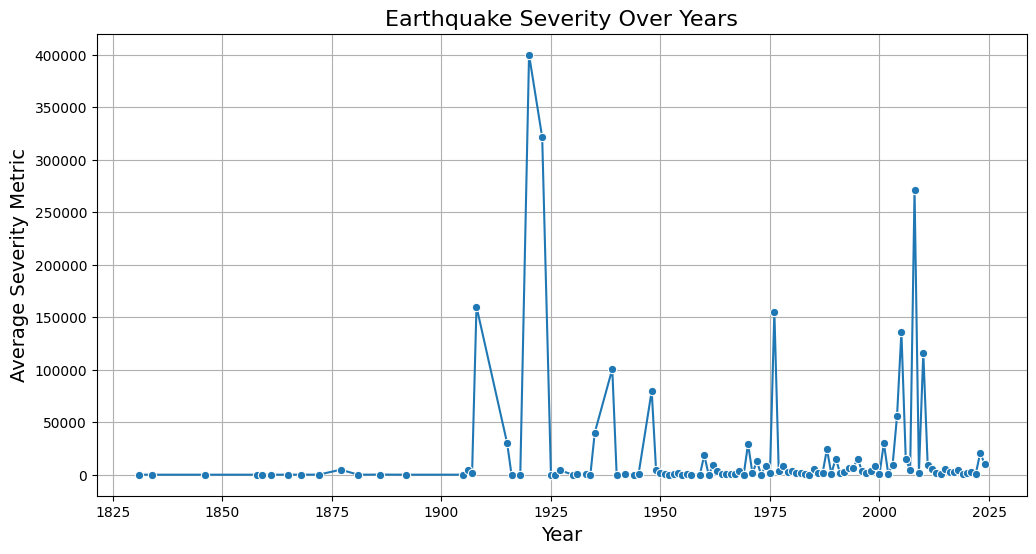

In [139]:
if 'Date' in earthquake_clustered.columns:
    earthquake_clustered['Year'] = pd.to_datetime(earthquake_clustered['Date'], errors='coerce').dt.year

severity_by_year = earthquake_clustered.groupby('Year')['severity_metric'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=severity_by_year, x='Year', y='severity_metric', marker='o')
plt.title('Earthquake Severity Over Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Severity Metric', fontsize=14)
plt.grid(True)
plt.show()


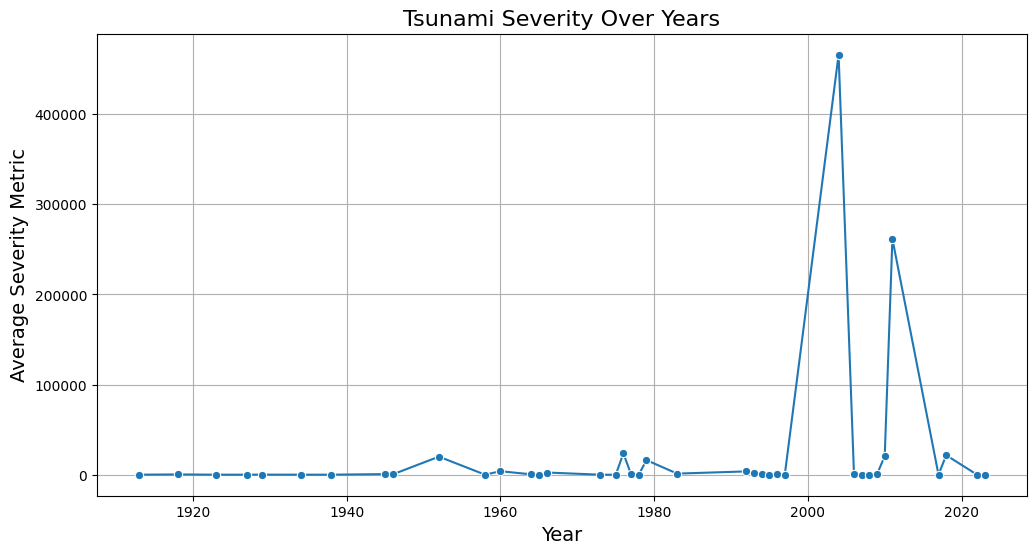

In [141]:
if 'Date' in tsunami_clustered.columns:
    tsunami_clustered['Year'] = pd.to_datetime(etsunami_clustered['Date'], errors='coerce').dt.year

severity_by_year = tsunami_clustered.groupby('Year')['severity_metric'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=severity_by_year, x='Year', y='severity_metric', marker='o')
plt.title('Tsunami Severity Over Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Severity Metric', fontsize=14)
plt.grid(True)
plt.show()
